## Welcome to the Movie Data Analysis

### Data Analysis Process:
<ul>
    <li>Question</li>
    <li>Data Wrangling</li>
    <li>Explore</li>
    <li>Draw Conclusions</li>
    <li>Communicate</li>
</ul>

### Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangle">Data Wrangling</a></li>
    <li><a href="#explore">Exploring Data</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="intro"></a>
### Introduction
> In this project we analyze revenue, budget and the top 5 movies with the highest revenue of 2015. 
We start by cleaning the data. Followed by cleaning, we explore our data. Just before Exploring Data 
we print out the dataframe to see what we kept and what we got rid of. Finally, we analyze and dig deeper into 2015
where we begin to chart our data beginning with top 5 movies with the highest revenues. Following, we plot both revenue and budget using a histogram which shows us the distribution of the data. Our final chart shows us the relationship between both revenue and budget using a scatter plot. By using the scatter plot we can see whether the relationship is positive or negative. 

> **Step 1** - The code block below imports the necessary packages used to open our data into a dataframe which we can then deconstruct and start to view our data. Our final piece of code (df = pd.read_csv('tmdb-movies.csv')) enables us to access the csv file so that we can use the necessary packages to explore our data. (packages: pandas, matplotlib, csv)

In [82]:
# here we're importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv 
# assigning the csv file to variable df
df = pd.read_csv('tmdb-movies.csv')

<a id="wrangle"></a>
### Data Wrangling

> **Step 2** - The code below shows us the data that is in the csv file. We can then access and see the revenue in the dataset like so: df['revenue']. But here we're using df.info to show us all of our data within the csv file. 

In [83]:
# checking the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Duplicate Values
> Making sure there are no duplicates in the data. If there are any duplicated values, we drop/remove them from the dataframe.

> **Step 3** - We'll be dissecting the next 3 code blocks. <br/>

>**Code block 3 - First Cell**: Here, we are finding the total value of duplicated items in the dataset. <br/>
As we can see, there's a total number of 1 duplicated item(s) in the dataset. 

>**Code block 4 - Second Cell**: Here, we are removing the duplicated items in the dataset. 

>**Code block 5 - Third Cell**: Finally, we check to see if we have successfully removed the duplicated data in the dataset by using the same code from the first block. Which just sums the total number of duplicated items (if any) in the dataset. 

In [84]:
# checking any duplicated values
sum(df.duplicated())

1

In [85]:
# dropping all duplicated items in the data
df.drop_duplicates(inplace=True)

In [86]:
# checking to see if all duplicate data was deleted successfully
sum(df.duplicated())

0

#### NaN - Null Values
> Addressing NaN - Null Values.
After seeing the data as a whole, I decided to keep certain columns and fill 
NaN values as 'No (the_column_name)'. Then finally dropping/removing the columns I won't need.

> **Step 4** - Let's dissect the next 4 blocks of code. <br/>

> **Code block 6 - First Cell**: The very first line of code extracts the 'cast' data. Originally when reviewing the data we found a few inconsistencies that needed to be changed in order proceed with our findings. The inconsistencies we found were that both the data from 'cast' and 'genres' were being separated by a '|' (pipe) character instead of a ',' (comma). Therefore, we used code to remove the '|' (pipe) character and by default was set to a ',' (comma). We then reassigned the correct character in the data, which gives us the correct outcome in the data. <br/>
We do this for both 'cast' and 'genre'.

> **Code block 7 - Second Cell**: So after finding a few inconsistencies in our data, we now had to review the data again and we notice that there was missing data. To resolve this issue we use code, specifically the _.fillna()_ function from our package pandas, which allows us to fill in the data. <br/>
We do this for the following data: cast, genre, and overview.

> **Code block 8 - Third Cell**: This block of code, as the name implies, _drops_ or _removes_ the following data that we will no longer need in our dataset. 

> **Code block 9  - Fourth Cell**: Finally, we check to see what data we have left and if there is no missing data. 

In [87]:
# these two blocks of code remove the | out of the data
df['cast'] = df['cast'].str.split('|')
df['genres'] = df['genres'].str.split('|')

In [88]:
# these three blocks of code fill the data with the column name 
df['cast'] = df['cast'].fillna('No Cast')
df['genres'] = df['genres'].fillna('No Genre')
df['overview'] = df['overview'].fillna('No Overview')

In [89]:
# dropping all the columns I don't need
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'production_companies', 'director', 'overview'], axis=1, inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


<a id="explore"></a>
## Exploring Data

> **Step 5 - Section A** - We finally get to see our data and begin to answer questions. Since the graphs take up most of the screen real estate, we'll be using _sections_ to follow the code.

> **Code block 10 - First Cell**: To ask questions regarding a specific time period, we use the pandas function _.query()_ which allows us to essentially filter the data if certain conditions are met. Here, the condition is, if the dataset 'release_year' is equal to 2015 (for the year we want), then sort the values by 'revenue' first and 'original_title' second. Finally, grab the last 5 values of the dataset. <br/>
To break it down further, we'll take it step by step. <br/>
**.query()**: Let's us filter the data if a condition is met. <br/>
**.sort_values()**: Let's us sort (in ascending order by default) our data. <br/>
**.iloc[]**: Let's us grab any index in the dataset. <br/>
The second and third lines of code assign the data we want, which is 'revenue' and 'original_title', and sort them by descending order. 


> **Code block 11 - Second Cell**: This cell simply is to plot the chart. 

### Question 1: What are the top 5 highest revenue films in 2015?

In [91]:
# df_sort gives us all the last 5 movies in 2015 sorted by the highest revenue
df_sort = df.query('release_year == 2015').sort_values(['revenue', 'original_title']).iloc[-5:]
df_sort_revenue = df_sort['revenue'].sort_values(ascending=False)
df_sort_og = df_sort['original_title'].sort_values(ascending=False)

[Text(0,0,'0'),
 Text(0,0,'$250M'),
 Text(0,0,'$500M'),
 Text(0,0,'$750M'),
 Text(0,0,'$1B'),
 Text(0,0,'$1.25B'),
 Text(0,0,'$1.5B'),
 Text(0,0,'$1.75B'),
 Text(0,0,'$2B')]

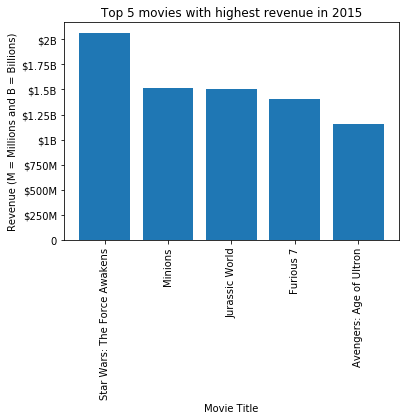

In [92]:
%matplotlib inline
y_ticks = ['0', '$250M', '$500M', '$750M', '$1B', '$1.25B', '$1.5B', '$1.75B', '$2B']
plt.bar(df_sort_og, df_sort_revenue)
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Revenue (M = Millions and B = Billions)')
plt.title('Top 5 movies with highest revenue in 2015')
plt.gca().invert_xaxis()
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_yticklabels(y_ticks)

### Question 2: In 2015, what was the budget distribution?

> **Step 5 - Section B**

> **Code block 17**: Instead of using a bar chart like our previous chart, we use a histogram which shows us the distribution of a given piece of data. This particular chart shows us the distribution in budget for movies in 2015.

[Text(0,0,'0'),
 Text(0,0,'0'),
 Text(0,0,'$50M'),
 Text(0,0,'$100M'),
 Text(0,0,'$150M'),
 Text(0,0,'$200M'),
 Text(0,0,'$250M')]

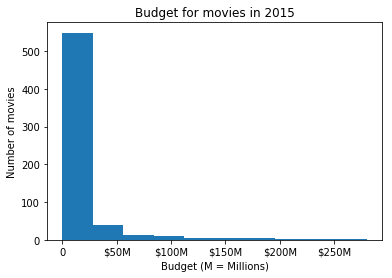

In [93]:
%matplotlib inline
# plotting a histogram based on the budget in 2015
x_ticks = ['0', '0', '$50M', '$100M', '$150M', '$200M', '$250M']
plt.hist(df.query('release_year == 2015')['budget'])
plt.xlabel('Budget (M = Millions)')
plt.ylabel('Number of movies')
plt.title('Budget for movies in 2015')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_xticklabels(x_ticks)

### Question 3: In 2015, what was the revenue distribution? 

> **Step 5 - Section C**

> **Code block 16**: Again, instead of using a bar chart like our first chart, we use a histogram which shows us the distribution of a given piece of data. This particular chart shows us the distribution in revenue for movies in 2015. 

[Text(0,0,'0'),
 Text(0,0,'0'),
 Text(0,0,'$5M'),
 Text(0,0,'$1B'),
 Text(0,0,'$1.5B'),
 Text(0,0,'$2B')]

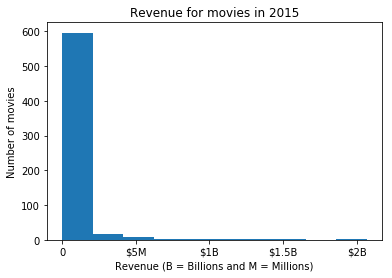

In [94]:
%matplotlib inline
# plotting a histogram on the revenue in 2015
x_ticks = ['0', '0', '$5M', '$1B', '$1.5B', '$2B']
plt.hist(df.query('release_year == 2015')['revenue'])
plt.xlabel('Revenue (B = Billions and M = Millions)')
plt.ylabel('Number of movies')
plt.title('Revenue for movies in 2015')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_xticklabels(x_ticks)

### Question 4: What is the correlation from budget and revenue in 2015?

> **Step 5 - Section D**

> **Code block 18**: To see whether a relationship is positive or negative we can use a scatter plot. 
This chart in particular measures the relationship between revenue and budget for movies in 2015.

[Text(0,0,'0'),
 Text(0,0,'0'),
 Text(0,0,'$5M'),
 Text(0,0,'$1B'),
 Text(0,0,'$1.5B'),
 Text(0,0,'$2B')]

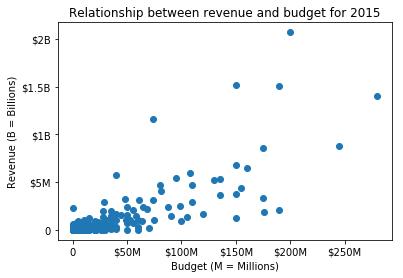

In [95]:
# variables budget and revenue give us the budget and revenue values once sorted and filtered for 2015
x_ticks = ['0', '0', '$50M', '$100M', '$150M', '$200M', '$250M']
y_ticks = ['0', '0', '$5M', '$1B', '$1.5B', '$2B']
budget = df.query('release_year == 2015').sort_values(['budget'])['budget']
revenue = df.query('release_year == 2015').sort_values(['budget'])['revenue']
plt.scatter(budget, revenue)
plt.xlabel('Budget (M = Millions)')
plt.ylabel('Revenue (B = Billions)')
plt.title('Relationship between revenue and budget for 2015')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_xticklabels(x_ticks)
ax.set_yticklabels(y_ticks)

<a id="conclusions"></a>
## Conclusions

> After we cleaned the data, saw, and plotted the data, we see how movies have grown over the years in terms of revenue and budget. <br/>

> **Limitations**: I believe that we could have posed far better and deeper questions if some of the data wasn't incomplete. Which ultimately lead to the questions that we decided to ask and answer. <br/>
We were limited in some deeper aspects of the data. For example, say we wanted to find the total amount the movie paid its cast members. Some of the data was redundant and definitely not needed which lead us to ask broad questions.


> **Question 1**: What are the top 5 highest revenue films in 2015? <br/>
**Answer**: Our bar chart shows us that the film with the highest revenue was Star Wars: The Force Awakens

> **Question 2**: In 2015, what was the budget distribution? <br/>
**Answer**: Right Skewed. As we can see from our next question, high budget films earn high revenue. 

> **Question 3**: In 2015, what was the revenue distribution? <br/>
**Answer**: Right Skewed. Vice Versa, low budget films, earn low revenue. 

> **Question 4**: What is the correlation from budget and revenue in 2015? <br/>
**Answer**: We have a positive correlation. Again, where we can see, high budget films earn high revenue. 